In [1]:
import warnings

warnings.filterwarnings('ignore')

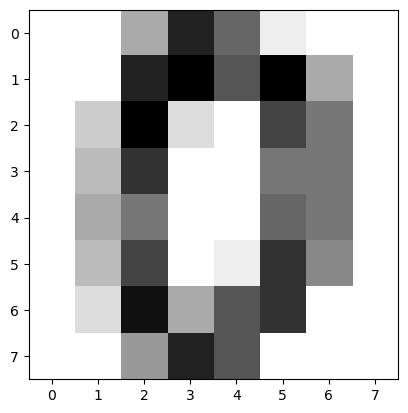

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [5]:
print(X_train.shape)

(1437, 64)


In [6]:
from keras import models
from keras import layers
from keras.optimizers import Adam

def build_model(): 
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='sigmoid', input_shape=(64,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    return model

In [7]:
model = build_model() 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 6,938
Trainable params: 6,938
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
model_history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test_one_hot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 2.2195 - accuracy: 0.1958 - val_loss: 2.1528 - val_accuracy: 0.2431
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 1.9824 - accuracy: 0.3037 - val_loss: 1.9440 - val_accuracy: 0.2951
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 1.7260 - accuracy: 0.4378 - val_loss: 1.6870 - val_accuracy: 0.4410
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4621 - accuracy: 0.5370 - val_loss: 1.4194 - val_accuracy: 0.6250
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.1853 - accuracy: 0.7346 - val_loss: 1.1260 - val_accuracy: 0.7951
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8958 - accuracy: 0.8721 - val_loss: 0.8145 - val_accuracy: 0.9062
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.9217 - val_loss: 0.5791 - val_accuracy: 0.9201
Epoch 8/100


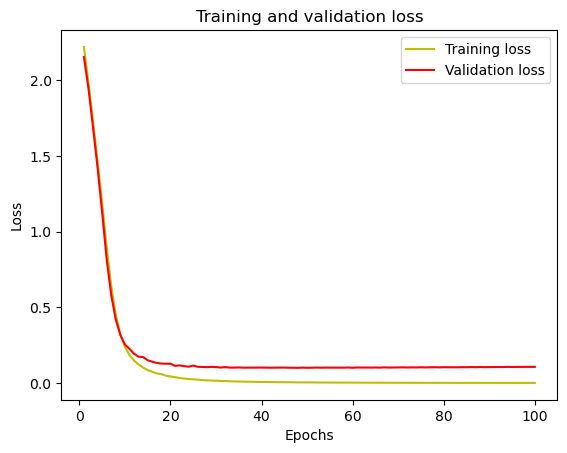

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

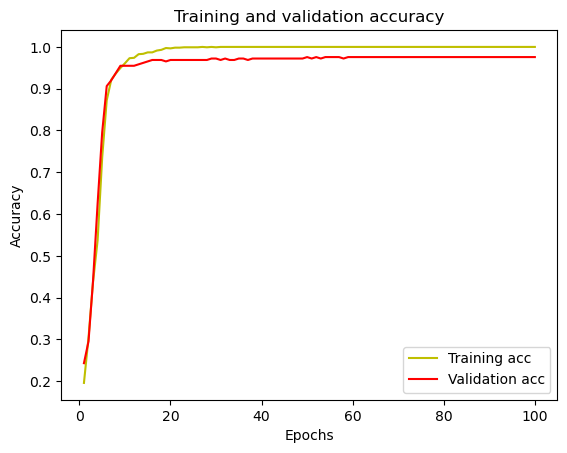

In [11]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()